From https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from matplotlib import pyplot as plt

X, y = data = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''

    dfs = []
    models = [
          ('LogReg', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [4]:
final = run_exps(X_train, y_train, X_test, y_test)

/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

LogReg
              precision    recall  f1-score   support

   malignant       0.88      0.93      0.90        45
      benign       0.97      0.94      0.95        98

    accuracy                           0.94       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

RF
              precision    recall  f1-score   support

   malignant       0.90      0.96      0.92        45
      benign       0.98      0.95      0.96        98

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.95      0.95       143

KNN
              precision    recall  f1-score   support

   malignant       0.87      0.87      0.87        45
      benign       0.94      0.94      0.94        98

    accuracy                           0.92       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.92      0.92      0.92       143

SVM
 

/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/rozierale/.miniconda3/envs/fastML/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/rozierale/.miniconda3/envs/fastML/lib/

In [6]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [11]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

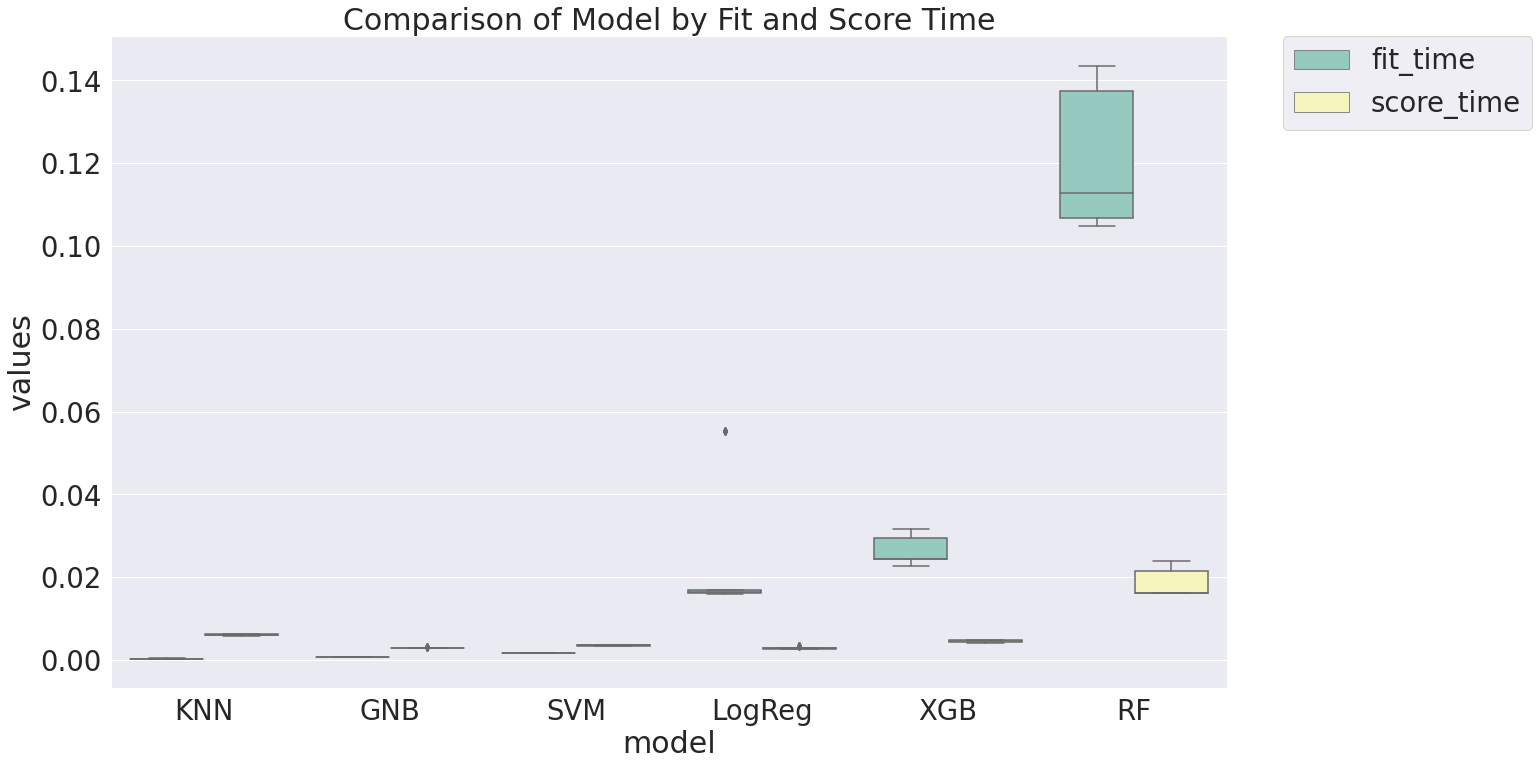

In [12]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

In [13]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_roc_auc           test_precision_weighted  \
                 std      mean          std      mean                     std   
model                                                                           
GNB         0.028919  0.947542     0.005286  0.991099                0.028187   
KNN         0.036724  0.926047     0.021426  0.961954                0.033460   
LogReg      0.020707  0.942098     0.003367  0.990474                0.020005   
RF          0.021540  0.956927     0.007573  0.993142                0.019185   
SVM         0.032009  0.924081     0.009511  0.978968                0.025330   
XGB         0.010143  0.971017     0.006348  0.994621                0.009097   

                 test_f1_weighted           test_recall_weighted            
            mean              std      mean                  std      mean  
model                                                                       
GNB     0.949698         0.029073  0.947214             0.028919  0.947542  
KNN     0.928761         0.037999  0.925283             0.036724  0.926047  
LogReg  0.943288         0.021113  0.941824             0.020707  0.942098  
RF      0.960297         0.021458  0.956973             0.021540  0.956927  
SVM     0.930457         0.033685  0.922624             0.032009  0.924081  
XGB     0.972701         0.010337  0.970901             0.010143  0.971017

In [14]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_roc_auc           test_precision_weighted  \
                 std      mean          std      mean                     std   
model                                                                           
GNB         0.028919  0.947542     0.005286  0.991099                0.028187   
KNN         0.036724  0.926047     0.021426  0.961954                0.033460   
LogReg      0.020707  0.942098     0.003367  0.990474                0.020005   
RF          0.021540  0.956927     0.007573  0.993142                0.019185   
SVM         0.032009  0.924081     0.009511  0.978968                0.025330   
XGB         0.010143  0.971017     0.006348  0.994621                0.009097   

                 test_f1_weighted           test_recall_weighted            
            mean              std      mean                  std      mean  
model                                                                       
GNB     0.949698         0.029073  0.947214             0.028919  0.947542  
KNN     0.928761         0.037999  0.925283             0.036724  0.926047  
LogReg  0.943288         0.021113  0.941824             0.020707  0.942098  
RF      0.960297         0.021458  0.956973             0.021540  0.956927  
SVM     0.930457         0.033685  0.922624             0.032009  0.924081  
XGB     0.972701         0.010337  0.970901             0.010143  0.971017